author: okryzhan vprypesh

In [1]:
import numpy as np
import matplotlib.pyplot as mp

In [2]:
np.random.rand(5, 5)

array([[0.57411409, 0.08197309, 0.74129783, 0.16688591, 0.08000494],
       [0.48324469, 0.09758164, 0.20731634, 0.11360079, 0.71858214],
       [0.97238895, 0.96579594, 0.05201035, 0.53101633, 0.8380906 ],
       [0.41584717, 0.98056916, 0.35134165, 0.87734793, 0.08996696],
       [0.36191601, 0.57398801, 0.21042934, 0.82401315, 0.14888739]])

In [3]:
a = np.arange(12)
a.reshape(4, 3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [4]:
def incr_arr(n):
        return np.linspace(0, 1, n).reshape(1, n)

incr_arr(5).shape

(1, 5)

In [5]:
z = np.random.rand(10, 12)
z1 = z[0:5, 8:]

(20, 100)


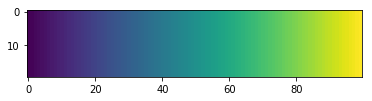

In [6]:
n, m = 100, 20
res = incr_arr(n)
for i in range(1, m):
    res = np.concatenate((res, incr_arr(n)), axis=0)
print(res.shape)
mp.imshow(res)

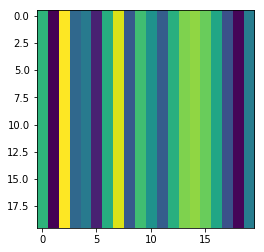

In [53]:
def rand_arr(n):
    return np.random.rand(n).reshape(1, n)

matrix = rand_arr(m)
for i in range(1, n):
    matrix = np.concatenate((matrix, rand_arr(m)), axis=0)
mult = res @ matrix
mp.imshow(mult)

Part II

In [8]:
def distance(x1, x2, y1, y2):
    xx = (x2 - x1) ** 2
    yy = (y2 - y1) ** 2
    return (np.sqrt(xx + yy))

In [9]:
def Vignette(img, rad_div, hardness):
    height, width = img.shape[:2]
    center = (width / 2, height / 2)
    rad = center[0] if center[0] < center[1] else center[1]
    rad /= rad_div
    for row in range(height):
        for col in range(width):
            r, g, b = img[row, col, :3] * 255
            dist = distance(center[0], col, center[1], row)
            if (dist > rad):
                dif = (dist - rad) * hardness
                r -= dif
                g -= dif
                b -= dif
                img[row, col, 0] = r / 255
                img[row, col, 1] = g / 255
                img[row, col, 2] = b / 255
    return np.clip(img, 0, 1)

In [10]:
def halk(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            tmp = img[row, col, 0]
            img[row, col, 0] = img[row, col, 1]
            img[row, col, 1] = tmp
    return img

def smurf(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            tmp = img[row, col, 0]
            img[row, col, 0] = img[row, col, 2]
            img[row, col, 2] = tmp
    return img

In [11]:
def Hudson(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row, col, 0] *= 1
            img[row, col, 1] *= 1
            img[row, col, 2] *= 1.2
    img = img + 0.03
    img = Vignette(img, 1.2, 0.6)
    return np.clip(img, 0, 1)

In [12]:
def Lo_fi(img, hardness):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
                img[row, col, 0] *= 1.45
                img[row, col, 1] *= 1.3
                img[row, col, 2] *= 1.3
    img = Vignette(img, 3.5, hardness)
    return np.clip(img, 0 ,1)

In [13]:
def Sierra(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row, col, 0] *= 1.1
    img = (img / 2 + 0.1) * 1.6
    Vignette(img, 1.2, 1)
    return np.clip(img, 0, 1)

In [14]:
def Valencia(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row, col, 0] *= 1.2
            img[row, col, 1] *= 1.1
    img = (img / 2 + 0.05) * 1.7
    Vignette(img, 1, 0.5)
    return np.clip(img, 0, 1)

In [64]:
def Sutro(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row, col, 0] *= 1.35
            img[row, col, 1] *= 1.2
            img[row, col, 2] *= 1.30
    img = (img / 2) * 1.7
    Vignette(img, 3, 0.7)
    return np.clip(img, 0, 1)

In [16]:
def f_1977(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row, col, 0] *= 1.5
            img[row, col, 2] *= 1.1
    return np.clip((img / 2.1 + 0.07) * 2 - 0.08, 0, 1)

In [36]:
def Kelvin(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row, col, 0] *= 1.9
            img[row, col, 1] *= 1.2
            img[row, col, 2] *= 0.5
    return np.clip((img / 2 + 0.08) * 1.7, 0, 1)

In [30]:
def Rise(img):
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            img[row, col, 0] *= 1.35
            img[row, col, 1] *= 1.05
            img[row, col, 2] *= 0.9
            if np.sum(img[row, col, :]) * 256 > 230:
                img[row, col] *= 0.8984375
    return Vignette(np.clip((img + 0.1) * 1.0005 + 0.075, 0, 1), 1.3, 0.8)

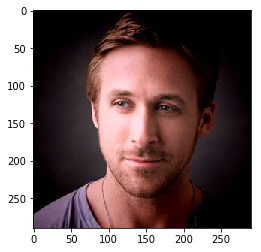

In [67]:
gosl = mp.imread('gosling.png')

image = gosl
# mp.imshow(Hudson(np.copy(image)))
# mp.imshow(Valencia(np.copy(image)))
# mp.imshow(Lo_fi(np.copy(image), 0.7))
# mp.imshow(Sierra(np.copy(image)))

mp.imshow(Sutro(np.copy(image)))
# mp.imshow(Rise(np.copy(image)))
# mp.imshow(f_1977(np.copy(image)))
# mp.imshow(Kelvin(np.copy(image)))
# mp.imshow(halk(np.copy(image)))
# mp.imshow(smurf(np.copy(image)))